# Problem 1

## Setup

In [1]:
import sys
sys.path.append("../src")

import numpy as np
from nat2324.problems import Objective
from nat2324.algorithms import SwarmOptimization
from nat2324.utils import visualize_objectives_3d, visualize_optimization_experiments, run_optimization_experiment

%load_ext autoreload
%autoreload 2

In [56]:
# Fix the number of evaluations
NUM_GENERATIONS = 1000

# Fix the problem difficulty
DIMENSION = 4
FUNCTION_TYPE = "rastrigin"
FUNCTION_BOUNDS = (-5.12, 5.12)

## Question (a)

### Particle Swarm Optimization

  0%|          | 0/299 [00:00<?, ?it/s]

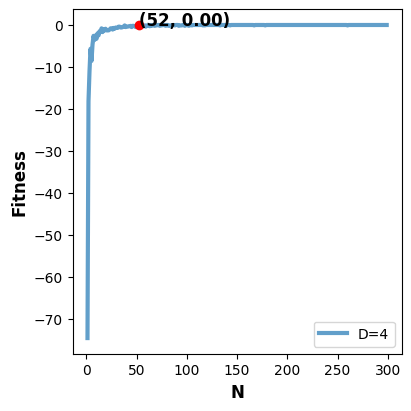

In [60]:
experiment_setup = {
    "N": range(1, 300, 1),
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "D": DIMENSION,
    "max_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=10,
    dirname="../experiments/problem1",
)

visualize_optimization_experiments(
    xs=experiment_setup,
    ys={"Fitness": results['N']},
    curve_labels="D=4",
    is_maximization=True,
    filepath="../experiments/problem1/fitness_vs_N.png",
)

### Other Metaheuristic algorithms

  0%|          | 0/396 [00:00<?, ?it/s]

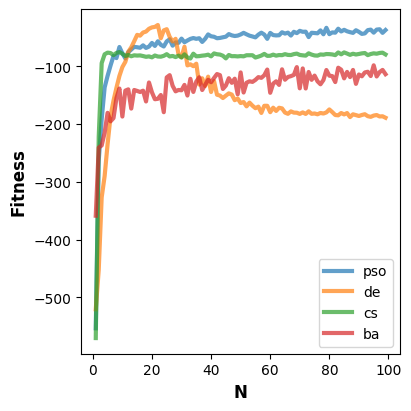

In [84]:
experiment_setup = {
    "N": range(1, 100, 1),
    "so_type": ["pso", "de", "cs", "ba"]
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "D": 30,
    "max_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    num_runs=20,
    dirname="../experiments/problem1",
)

visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"Fitness": results[('N', "so_type")][..., 0]},
    curve_labels=experiment_setup["so_type"],
    filepath="../experiments/problem1/fitness_vs_N_vs_pso_type.png",
)

## Question (b)

### Varying Space Dimension

In [142]:
experiment_setup = {
    "N": range(1, 2000, 50),
    "D": range(1, 200, 10),
    # "so_type": ["pso", "de"],
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "num_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=1,
    dirname="../experiments/problem1",
)

ps = results[('N', 'D', 'so_type')][:, :, 0]
de = results[('N', 'D', 'so_type')][:, :, 1]
ns = np.array(experiment_setup["N"])

  0%|          | 0/400 [00:00<?, ?it/s]

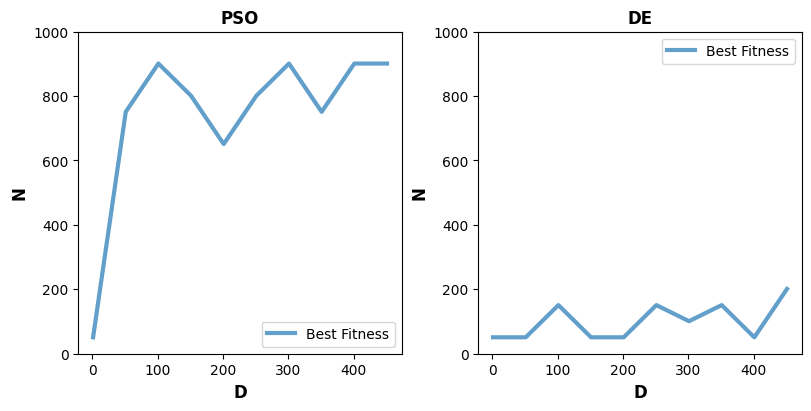

In [147]:
visualize_optimization_experiments(
    xs={"D": experiment_setup["D"]},
    ys={"PSO": ns[ps.argmax(0)], "DE": ns[de.argmax(0)]},
    curve_labels="Best Fitness",
    labels='N',
    ylim=(0, 1000),
    filepath="../experiments/problem1/dependency_on_D_1.png",
)

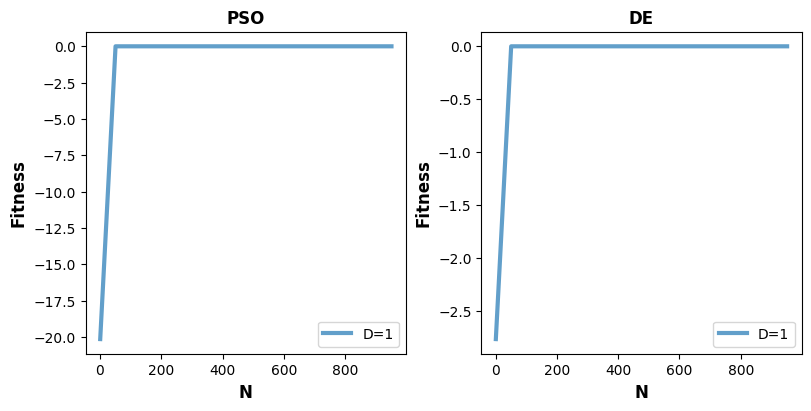

In [146]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"PSO": ps[:, ::10, 0], "DE": de[:, ::10, 0]},
    curve_labels=[f"D={d}" for d in list(experiment_setup["D"])[::10]],
    labels="Fitness",
    filepath="../experiments/problem1/dependency_on_D_2.png",
)

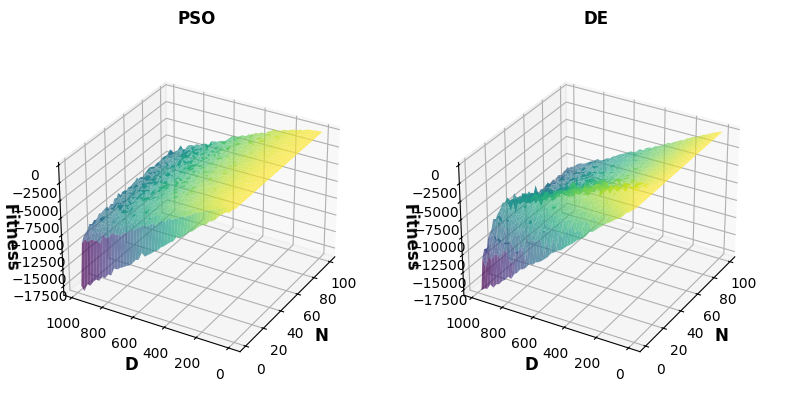

In [137]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={'D': experiment_setup['D']},
    zs={"PSO": ps, "DE": de},
    labels="Fitness",
    elev=30,
    azim=-150,
    filepath="../experiments/problem1/dependency_on_D_3.png",
)

### Varying Objective

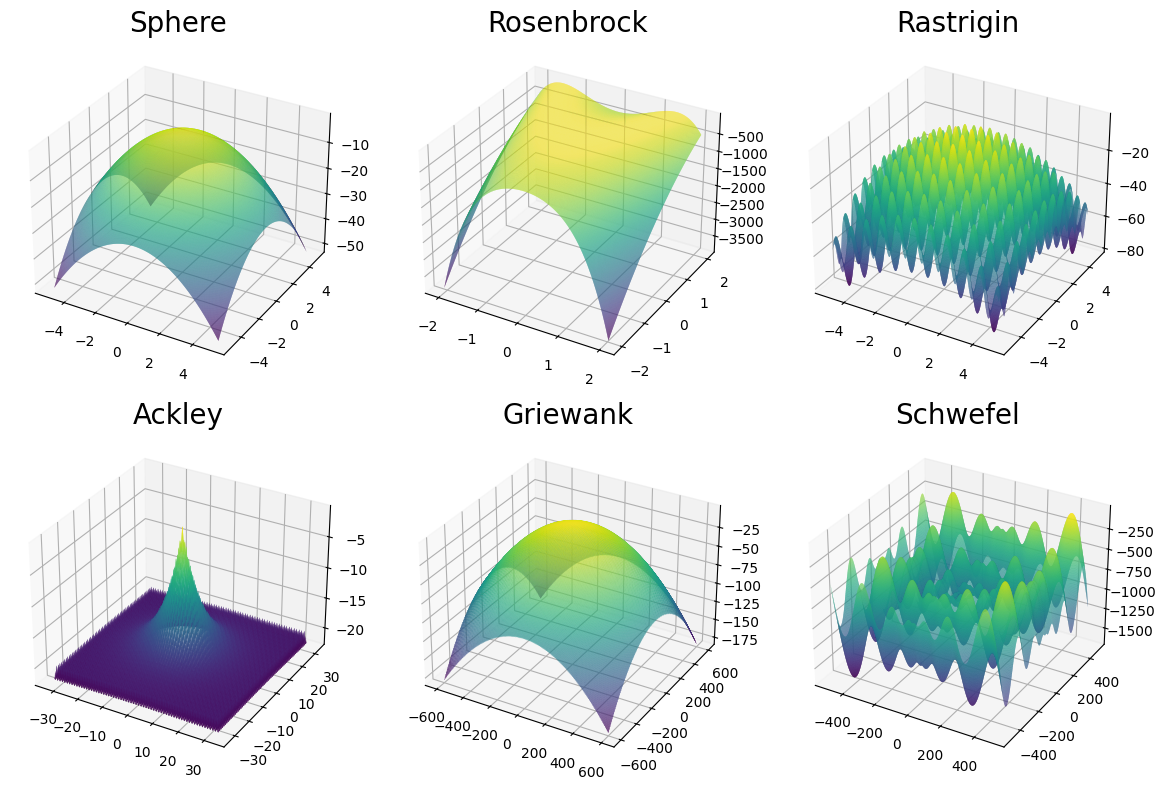

In [99]:
sphere = Objective(function_type="sphere", is_maximization=True)
rosenbrock = Objective(function_type="rosenbrock", is_maximization=True)
ackley = Objective(function_type="ackley", is_maximization=True)
rastrigin = Objective(function_type="rastrigin", is_maximization=True)
griewank = Objective(function_type="griewank", is_maximization=True)
schwefel = Objective(function_type="schwefel", is_maximization=True)

objectives = {
    "Sphere": (sphere, sphere.bounds),
    "Griewank": (griewank, griewank.bounds),
    "Ackley": (ackley, ackley.bounds),
    "Rosenbrock": (rosenbrock, rosenbrock.bounds),
    "Rastrigin": (rastrigin, rastrigin.bounds),
    "Schwefel": (schwefel, schwefel.bounds),
}

visualize_objectives_3d(
    objectives,
    num_points=500,
    max_col=3,
    filepath="../experiments/problem1/objectives.png",
)

In [106]:
experiment_setup = {
    'N': range(1, 100, 1),
    ("fitness_fn", "bounds"): objectives.values(),
}

default_kwargs = {
    "num_generations": NUM_GENERATIONS,
    "patience": None,
    "D": 30,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=10,
    dirname="../experiments/problem1",
)

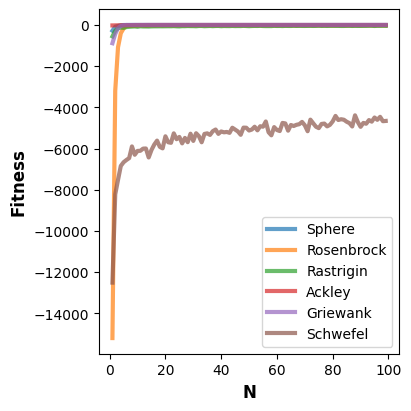

In [110]:
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(objectives.keys()),
    # ylim=(-100, 5),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_1.png",
)

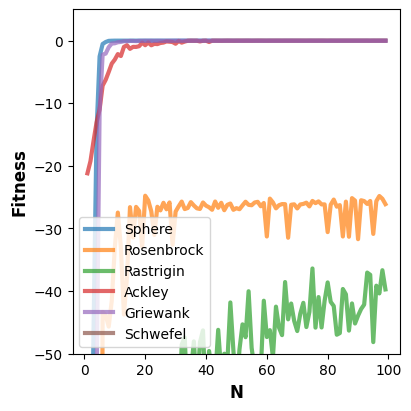

In [111]:
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(objectives.keys()),
    ylim=(-50, 5),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_2.png",
)

In [132]:
experiment_setup = {
    "so_type": ["pso", "de"],
    'N': range(1, 150, 5),
    'D': range(1, 300, 5),
    ("fitness_fn", "bounds"): objectives.values(),
}

default_kwargs = {
    "num_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=3,
    dirname="../experiments/problem1",
)



  0%|          | 0/21600 [00:00<?, ?it/s]

KeyboardInterrupt: 

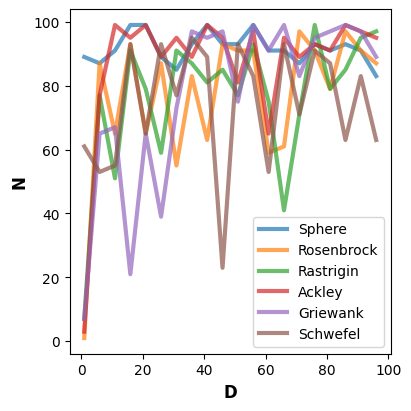

In [128]:
visualize_optimization_experiments(
    xs={'D': experiment_setup["D"]},
    # ys={'D': experiment_setup["D"]},
    ys={'N': np.array(experiment_setup["N"])[results[('N', 'D', ("fitness_fn", "bounds"))].argmax(0)][..., 0]},
    # zs={"Fitness": results[('N', 'D', ("fitness_fn", "bounds"))][:, :, :1, 0]},
    curve_labels=list(objectives.keys()),
    # ylim=(-100, 5),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective.png",
)

## Appendix A

### Algorithms vs Objectives vs Dimensions

In [ ]:
experiment_setup = {
    "so_type": ["pso", "de", "cs", "ba"],
    'N': range(1, 150, 3),
    'D': range(1, 200, 2),
    ("fitness_fn", "bounds"): objectives.values(),
}

default_kwargs = {
    "num_generations": NUM_GENERATIONS,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=10,
    dirname="../experiments/problem1",
)